In [13]:
import geokit as gk
import numpy as np
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt

# RegionMask
The RegionMask object is the geospatial representation of the given region, allows to combine raster and vector operations and many functions. 
The following shows only a few examples of these. 



Example for the Aachen-Region

In [14]:
# define the srs
aachen_centered_srs = gk.srs.centeredLAEA(6.083, 50.775)

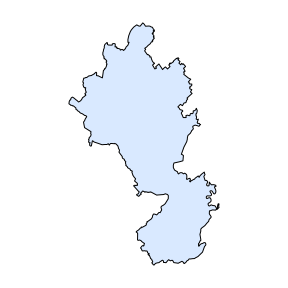

In [15]:
# load the region mask from the passed shape file
aachen_rm = gk.RegionMask.load(
    gk._test_data_["aachenShapefile.shp"], pixelRes=20, srs=aachen_centered_srs
)
aachen_rm

In [16]:
# Print information about the region mask
print("aachen_rm.extent", aachen_rm.extent)
# print("aachen_rm.srs", aachen_rm.srs)
print("aachen_rm.pixelWidth", aachen_rm.pixelWidth)
print("aachen_rm.pixelHeight", aachen_rm.pixelHeight)

aachen_rm.extent (-7640.00000,-31220.00000,23820.00000,19500.00000)
aachen_rm.pixelWidth 20
aachen_rm.pixelHeight 20


## Region Mask and Raster-File

A RegionMask object allows raster data to be warped onto the RegionMask's characteristics (as in the RegionMask's resolution, extent, and spatial reference system). This create a numpy matrix, from which only the pixels which lie in the region can be easily extracted and operated on.


Example: Extract the GHI-data for Aachen from a raster-file for the GHI in Germany.


In [17]:
ras = aachen_rm.warp(gk._test_data_["gsa-ghi-like.tif"], returnMatrix=False)

Draw Raster file in RegionMask.

AxHands(ax=<Axes: >, handles=<matplotlib.image.AxesImage object at 0x000001AE655F8670>, cbar=<matplotlib.colorbar.Colorbar object at 0x000001AE655FAAD0>)

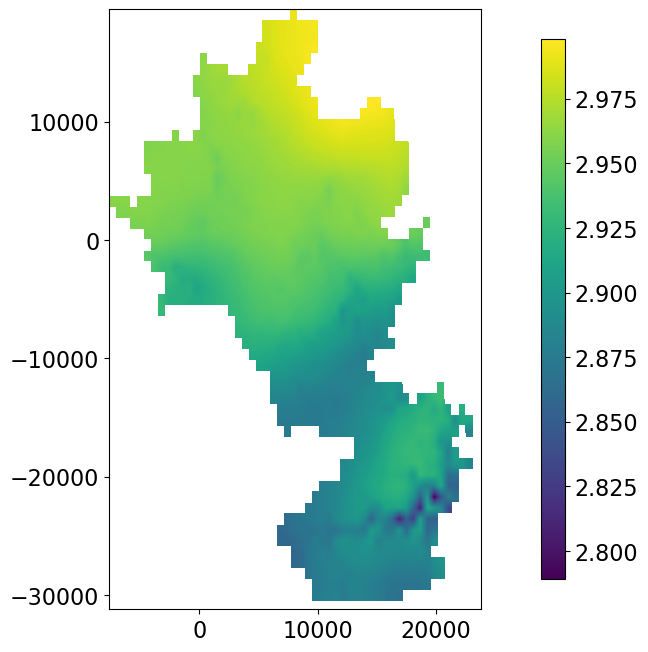

In [18]:
gk.drawRaster(ras, figsize=(6, 6))

Raster values: Average values and histogram

In [19]:
# Get the average of raster values which are within the region mask
aachen_rm.warp(gk._test_data_["gsa-ghi-like.tif"])[aachen_rm.mask].mean()

2.9310975

(array([1.93000e+02, 1.28100e+03, 4.91500e+03, 6.80170e+04, 3.40446e+05,
        1.96429e+05, 2.64498e+05, 2.99985e+05, 4.26737e+05, 1.71008e+05]),
 array([2.78905106, 2.81000066, 2.83095026, 2.8519001 , 2.8728497 ,
        2.8937993 , 2.91474891, 2.93569851, 2.95664835, 2.97759795,
        2.99854755]),
 <BarContainer object of 10 artists>)

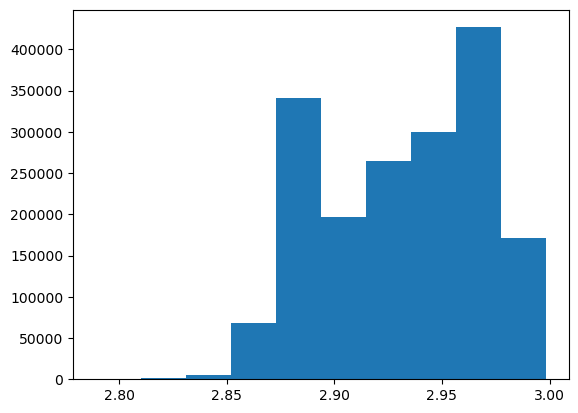

In [20]:
# plot histogramm of the values
plt.hist(aachen_rm.warp(gk._test_data_["gsa-ghi-like.tif"])[aachen_rm.mask])

## Region Mask and shp-file

Extract feature in a df.

In [21]:
aachen_points = aachen_rm.extractFeatures(gk._test_data_["turbinePlacements.shp"])
aachen_points.head()

,geom,FID
0,POINT (5.98519518411592 50.7972538800796),0
1,POINT (5.9946850348875 50.7942084158756),1
2,POINT (5.99410693905033 50.800938904832),2
3,POINT (6.0047500934257 50.7844315976052),3
4,POINT (6.00417362866228 50.7911621621515),4


1. Example: Show features in the region mask.

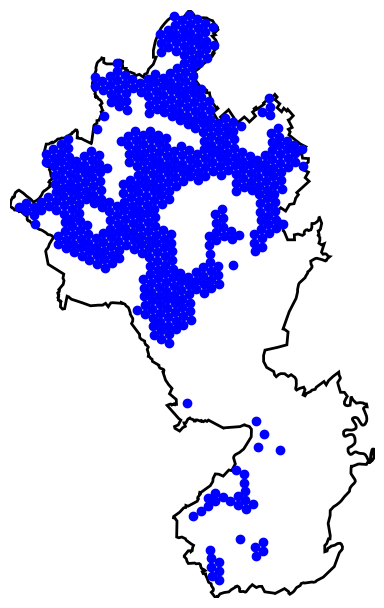

In [22]:
axh = aachen_rm.drawGeoms(aachen_points, figsize=(5, 6), hideAxis=True, color="b")
plt.show()

2. Example: Indicate features directly in region mask. Include a buffer around the features.

C:\Programming\geokit\geokit\core\regionmask.py:1535: UserWarning: Memory efficient multiProcess failed, returning to safe linear processing.
  warn(


Memory useage during calc: 369.48828125 MB


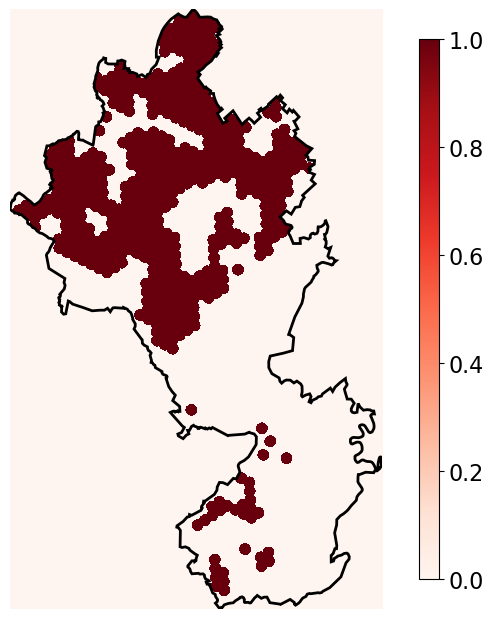

In [23]:
# Indicate RegionMask pixels within 500 meters of these points
isNearToTurbine = aachen_rm.indicateFeatures(
    gk._test_data_["turbinePlacements.shp"], buffer=500
)
# Visualize it!
axh = aachen_rm.drawImage(
    isNearToTurbine,
    figsize=(5, 6),
    hideAxis=True,
    cmap="Reds",
)
plt.show()

## Export a raster-tif-file for the region 

In [ ]:
# Create a raster
example_data = np.ones_like(aachen_rm.mask)
aachen_rm.createRaster(data=example_data, output="./rm_raster.tif")

PermissionError: Writing permission error for path: 

## Indicate areas with values

In [ ]:
# Show areas with GHI values > 2.9
tmp = aachen_rm.indicateValues(
    source=gk._test_data_["gsa-ghi-like.tif"],
    value=(2.9, None),
)

aachen_rm.drawImage(tmp, figsize=(6, 6))

In [ ]:
# Show areas with GHI values > 2.9 with buffer
tmp = aachen_rm.indicateValues(
    source=gk._test_data_["gsa-ghi-like.tif"], value=(2.9, None), buffer=100
)

aachen_rm.drawImage(tmp, figsize=(6, 6))